# IoU(Intersection over Union)
- 모델이 예측한 값(Predicted Bounding Box) 실측 값(Ground Truth)이 얼마나 정확하게 겹치는가를 나타내는 지표
- IoU = box가 서로 겹치는 영역(Area of Overlap) / 전체 box의 합집합 영역(Area of Union)

### 이미지 로드 및 후보 영역 추출

**[이미지](https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg) 로드**

In [1]:
!mkdir ./img
!wget -O ./img/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

mkdir: ./img: File exists
--2023-08-29 17:05:36--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 30102 (29K) [image/jpeg]
저장 위치: `./img/audrey01.jpg'

./img/audrey01.jpg  100%[===================>]  29.40K  --.-KB/s    /  0.002s  

2023-08-29 17:05:37 (14.9 MB/s) - `./img/audrey01.jpg' 저장함 [30102/30102]



**Selective Search를 이용하여 후보 영역 추출**

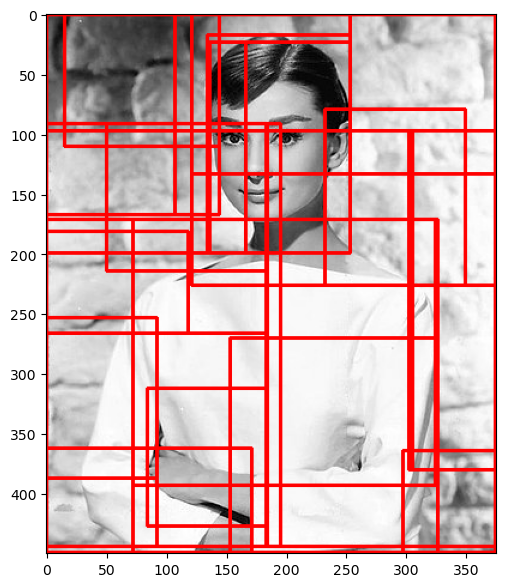

In [25]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os

# 이미지 불러오기
img = cv2.imread('./img/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Region Proposal -> (좌상단 x 좌표, 좌상단 y 좌표, width, height)
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]

# bounding box 시각화
red_rgb = (255, 0, 0)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=red_rgb, thickness=2)

plt.figure(figsize=(7, 7))
plt.imshow(img_rgb_copy)
plt.show()

### IoU를 계산하는 함수 생성
- Parameter: 후보(예측) bounding box, 실제 bounding box
- Return: 계산한 IoU 값

In [18]:
import numpy as np

# cand_box와 gt_box의 값 -> (좌상단 x, 좌상단 y, 우하단 x, 우하단 y)
def compute_iou(cand_box, gt_box):
    
    # intersection area 좌표 구하기
    # 일반적으로 Object bounding box 좌표 값은 x가 오른쪽으로 갈 수록 큰 값, y가 아래쪽으로 갈 수록 큰 값
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    # intersection area 크기
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    # union area 크기
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    # IoU = intersection(overlap) area / union area
    iou = intersection / union
    
    return iou

**실측(Ground Truth) Bounding Box**

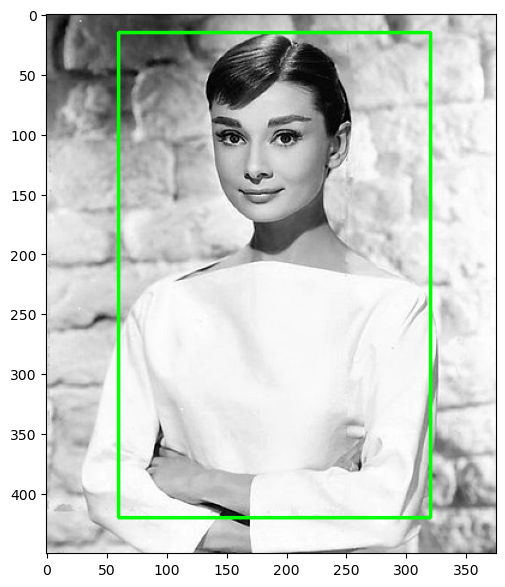

In [39]:
import cv2
import matplotlib.pyplot as plt
#%matplotlib inline

# 실제 box의 좌표가 아래와 같다고 가정 -> (좌상단 x, 좌상단 y, 우하단 x, 우하단 y)
gt_box = [60, 15, 320, 420]

img = cv2.imread('./img/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

green_rgb = (0, 255, 0)
img_rgb_copy = img_rgb.copy()
img_rgb_copy = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=green_rgb, thickness=2)

plt.figure(figsize=(7, 7))
plt.imshow(img_rgb_copy)
plt.show()

**IoU 계산**

In [24]:
cand_rects.sort() # 리스트 자체를 오름차순으로 정렬
cand_rects

[(0, 0, 107, 167),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 91, 183, 175),
 (0, 91, 183, 175),
 (0, 91, 183, 353),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 97, 374, 352),
 (0, 161, 70, 46),
 (0, 171, 326, 278),
 (0, 181, 118, 85),
 (0, 253, 92, 134),
 (0, 253, 92, 191),
 (0, 305, 47, 139),
 (0, 362, 171, 87),
 (15, 0, 129, 110),
 (50, 91, 133, 123),
 (72, 171, 252, 222),
 (72, 171, 254, 278),
 (84, 312, 100, 115),
 (84, 360, 91, 67),
 (104, 312, 80, 71),
 (106, 210, 89, 101),
 (121, 0, 253, 133),
 (121, 0, 253, 226),
 (134, 17, 73, 62),
 (134, 17, 119, 182),
 (136, 23, 117, 176),
 (136, 53, 88, 121),
 (153, 270, 173, 179),
 (166, 23, 87, 176),
 (232, 79, 117, 147),
 (297, 364, 77, 85),
 (302, 97, 72, 283),
 (302, 228, 66, 96),
 (305, 97, 69, 283)]

index: 7 iou: 0.5184766640298338 rectangle: (72, 171, 324, 393)
index: 15 iou: 0.5409250175192712 rectangle: (72, 171, 326, 449)
index: 25 iou: 0.5490037131949166 rectangle: (0, 97, 374, 449)
index: 29 iou: 0.6341234282410753 rectangle: (0, 0, 374, 444)
index: 30 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 31 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 32 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)


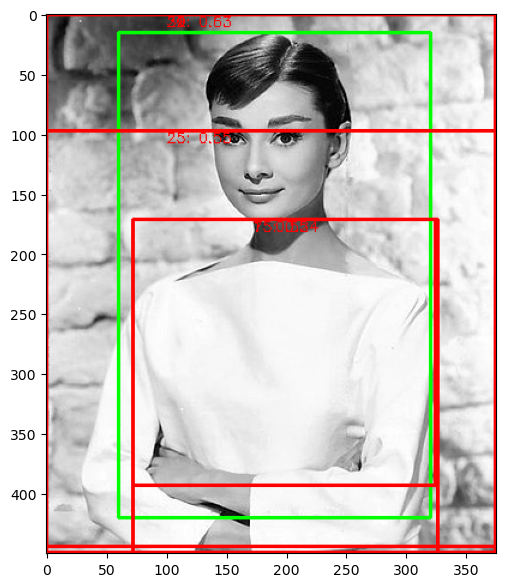

In [40]:
for index, cand_box in enumerate(cand_rects): # enumerate(): 인덱스와 원소로 이루어진 tuple 생성

    # cand_rects의 원소들은 튜플이기 때문에 리스트로 변환
    cand_box = list(cand_box)
    
    # (좌상단 x, 좌상단 y, width, height) -> (좌상단 x, 좌상단 y, 우하단 x, 우하단 y)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1] 
    
    # IoU 계산
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
        cv2.rectangle(img_rgb_copy, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=red_rgb, thickness=2)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb_copy, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4 , color=red_rgb, thickness=1)
    
plt.figure(figsize=(7, 7))
plt.imshow(img_rgb_copy)
plt.show()